In [1]:
import numpy as np
import matplotlib.pyplot as plt

Read in calibration files - magnetic field (Oe) measured by a hall probe at two different locations (sample location - centered, and measurement location - lowered) vs. voltage (V) applied to electromagnet

In [2]:
#column 1 = Voltage (V)
#column 2 = Field (Oe)
twopowersupplies_centered = np.loadtxt('Hcalib-double-center.csv',delimiter=',',unpack=True)
twopowersupplies_lowered = np.loadtxt('Hcalib-double-lower.csv',delimiter=',',unpack=True)

Checking that voltage is the same for both files - since it is, we can make a simple mapping from measured to sample field

<IPython.core.display.Javascript object>


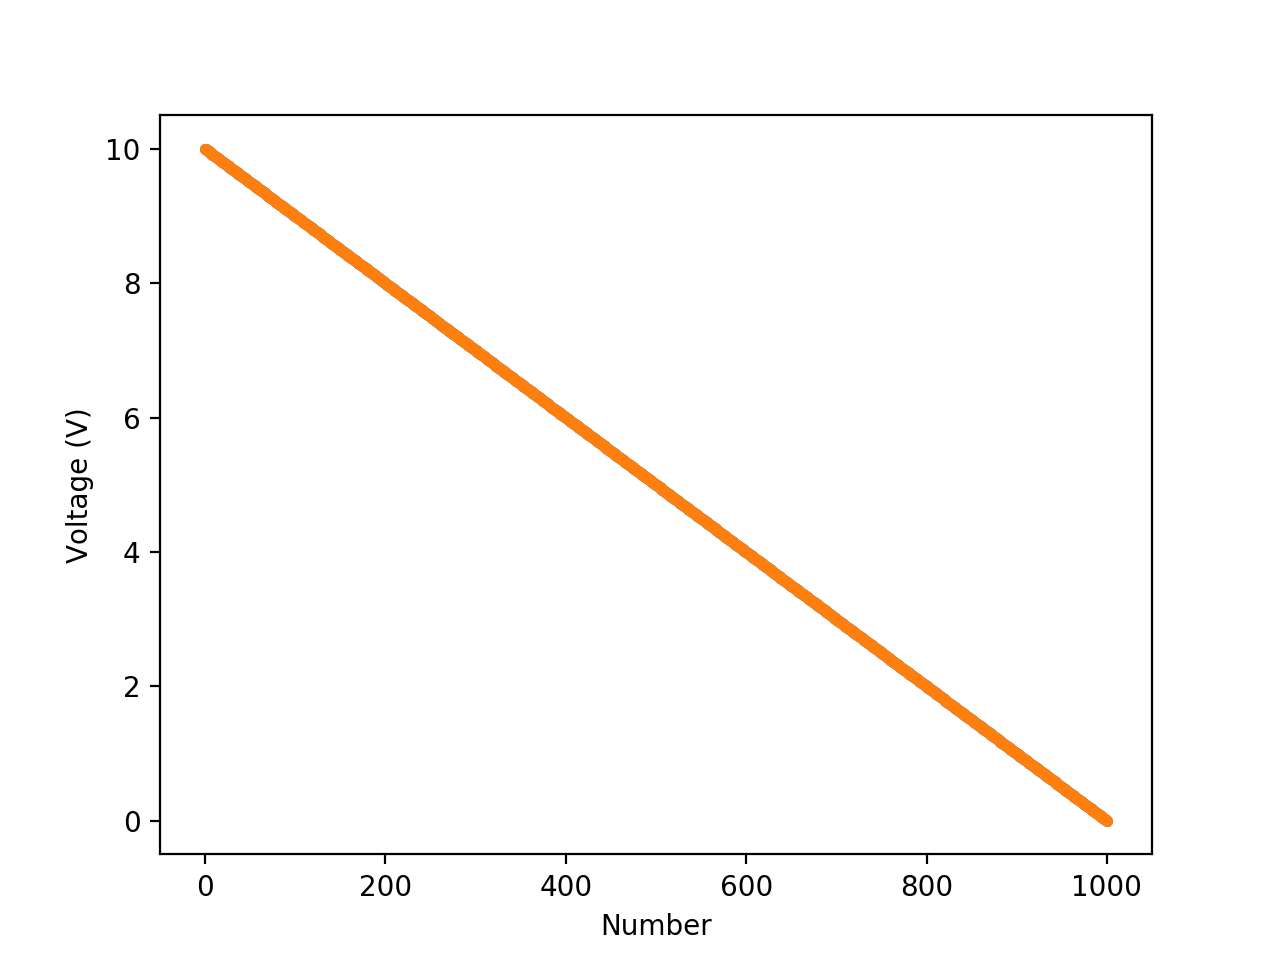

Text(0.5,0,u'Number')

In [3]:
%matplotlib notebook
plt.plot(twopowersupplies_centered[0],'.')
plt.plot(twopowersupplies_lowered[0],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Number')

<IPython.core.display.Javascript object>


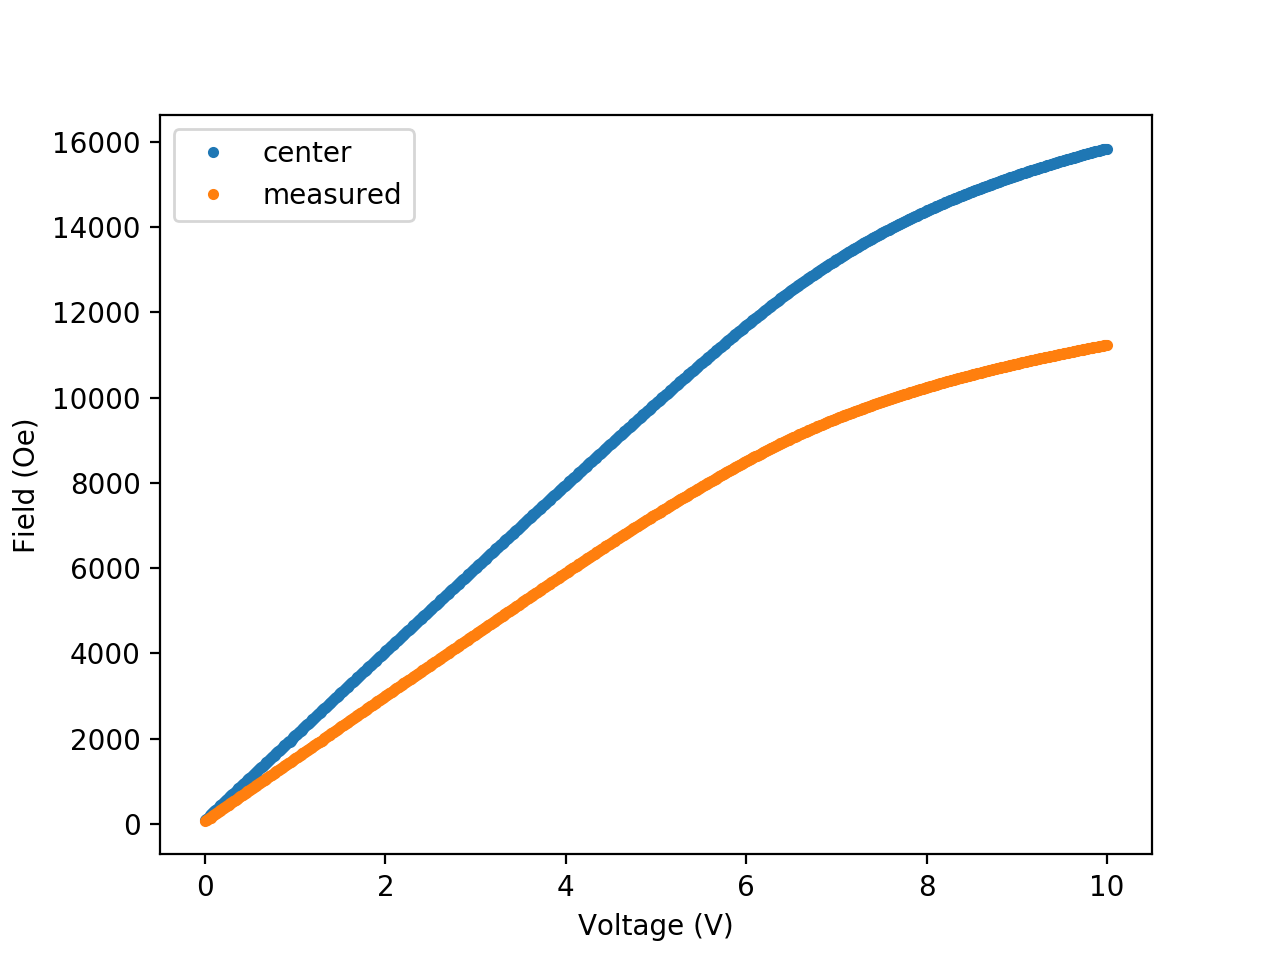

In [4]:
%matplotlib notebook
plt.plot(twopowersupplies_centered[0],twopowersupplies_centered[1],'.',label='center')
plt.plot(twopowersupplies_lowered[0],twopowersupplies_lowered[1],'.',label='measured')
plt.xlabel('Voltage (V)')
plt.ylabel('Field (Oe)')
plt.legend()

In [5]:
#reverse order of points so everything is monotonically increasing
voltage2 = twopowersupplies_lowered[0][::-1]
lower2 = twopowersupplies_lowered[1][::-1]
center2 = twopowersupplies_centered[1][::-1]

The Hall probe occasionally seems to give an erroneous reading, which is characterized by the field reading jumping up slightly for one point and then jumping down for two, before settling back to what looks to be the correct reading. This pattern of three non-monotonic points occasionally occurs (not sure why, but may be an instrument error, or interference with other instruments in the lab) and because it is monotonic, I will deal with it by just deleting it from the measured points

In [6]:
#order = np.argsort(twopowersupplies_lowered[1][slice2])
jumpdownlower = np.where(lower2[1:] <= lower2[:-1])[0]
print jumpdownlower
jumpdowncenter = np.where(center2[1:] <= center2[:-1])[0]
print jumpdowncenter

[  5 128 999]
[  1  93 999]


<IPython.core.display.Javascript object>


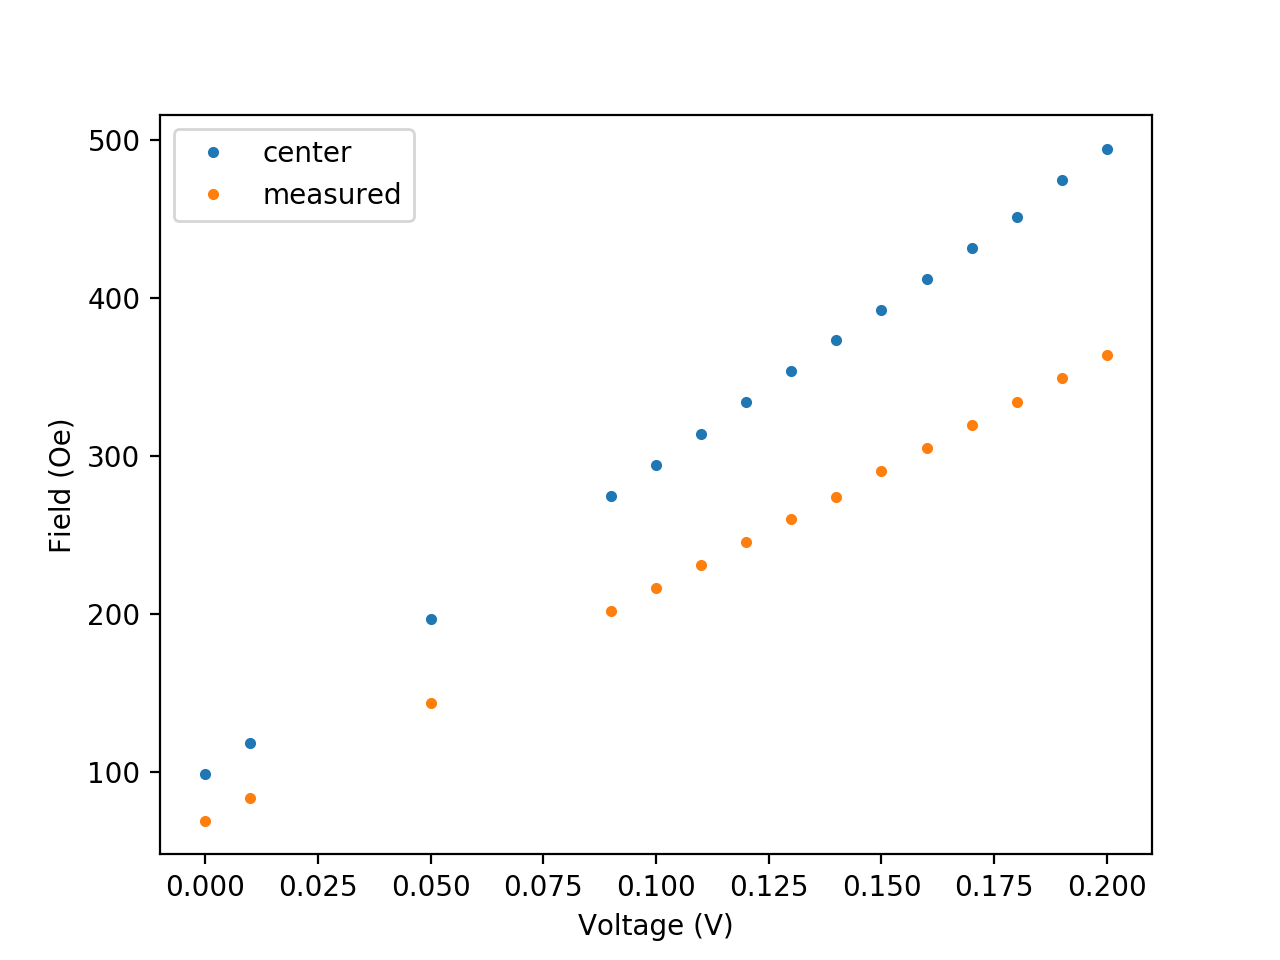

In [10]:
s = slice(None,15)
%matplotlib notebook
plt.plot(voltage2[s],center2[s],'.',label='center')
plt.plot(voltage2[s],lower2[s],'.',label='measured')
plt.xlabel('Voltage (V)')
plt.ylabel('Field (Oe)')
plt.legend()

In [11]:
while (len(jumpdownlower) > 0):
    start = jumpdownlower[0]+1
    sd = slice(start,start+3)
    voltage2 = np.delete(voltage2,sd)
    lower2 = np.delete(lower2,sd)
    center2 = np.delete(center2,sd)
    jumpdownlower = np.where(lower2[1:] <= lower2[:-1])[0]
    print jumpdownlower

In [12]:
while (len(jumpdowncenter) > 0):
    start = jumpdowncenter[0]+1
    sd = slice(start,start+3)
    voltage2 = np.delete(voltage2,sd)
    lower2 = np.delete(lower2,sd)
    center2 = np.delete(center2,sd)
    jumpdowncenter = np.where(center2[1:] <= center2[:-1])[0]
    print jumpdowncenter

<IPython.core.display.Javascript object>


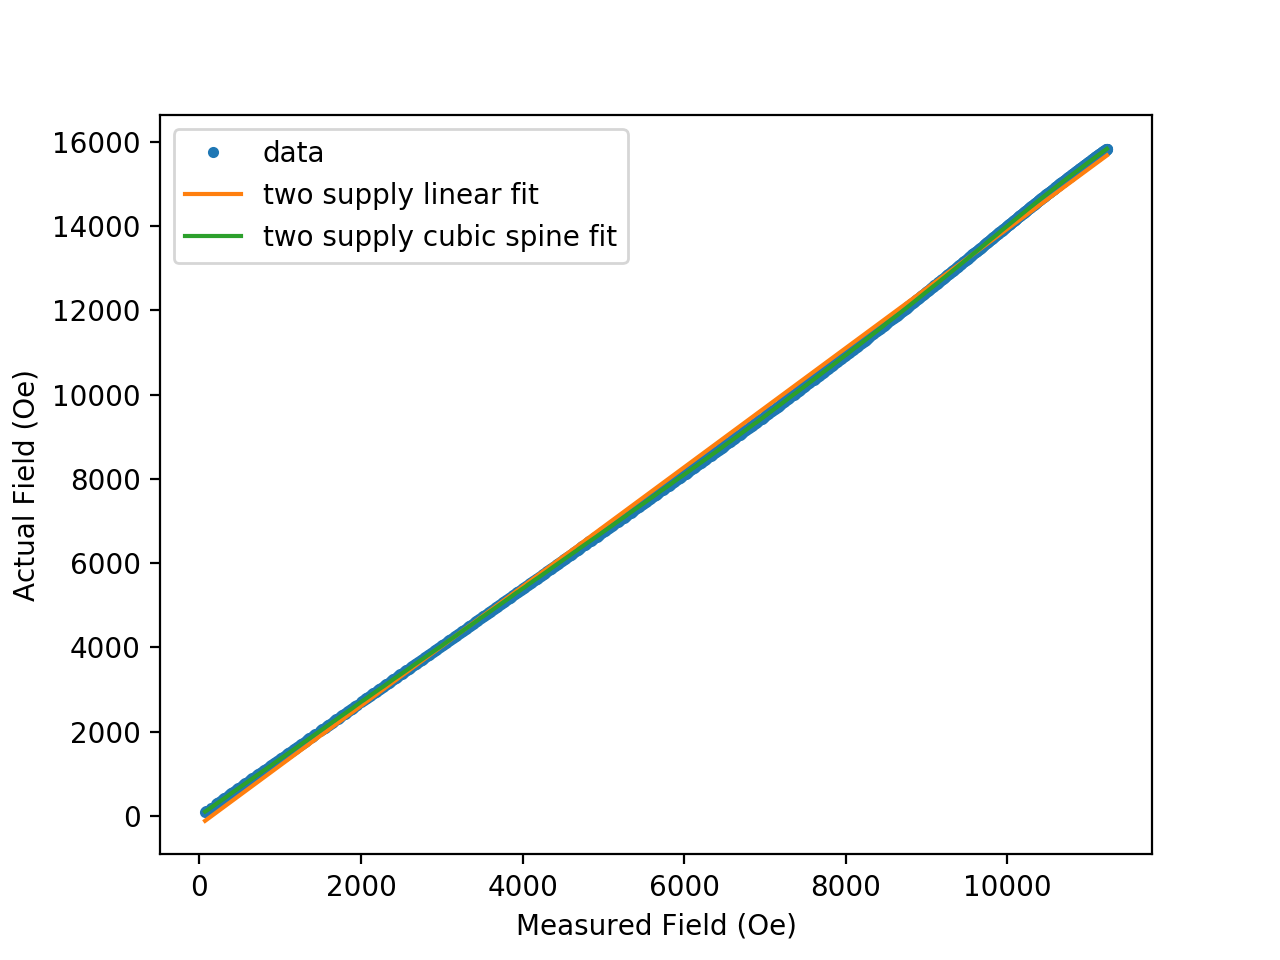

Text(0,0.5,u'Actual Field (Oe)')

In [13]:
%matplotlib notebook
plt.plot(lower2,center2,'.',label='data')
plt.xlabel('Measured Field (Oe)')
plt.ylabel('Actual Field (Oe)')

We want to map measured field on field at the sample - the proportion error on the measurement is +- 1/35,000 so negligible compared to the rest of the measurements - so we will ignore those for now

In [14]:
from numpy import polyfit, poly1d

In [15]:
#linear fit

doublecoefficients = polyfit(twopowersupplies_lowered[1],twopowersupplies_centered[1], 1)
doublefit = poly1d(doublecoefficients)
plt.plot(twopowersupplies_lowered[1],doublefit(twopowersupplies_lowered[1]),'-',label='two supply linear fit')
plt.legend()

print doublecoefficients

[   1.4155063  -216.26091426]


In [16]:
from scipy.interpolate import interp1d

In [17]:
#cubic spline

fit = interp1d(lower2,center2,kind='cubic')

plt.plot(lower2,fit(lower2),'-',label='two supply cubic spine fit')
plt.legend()

Observing the residuals from the fit, we see that the linear fit has regions of inaccuracy, while the cubic spline is good for our purposes, since we are not trying to extract any parameters

<IPython.core.display.Javascript object>


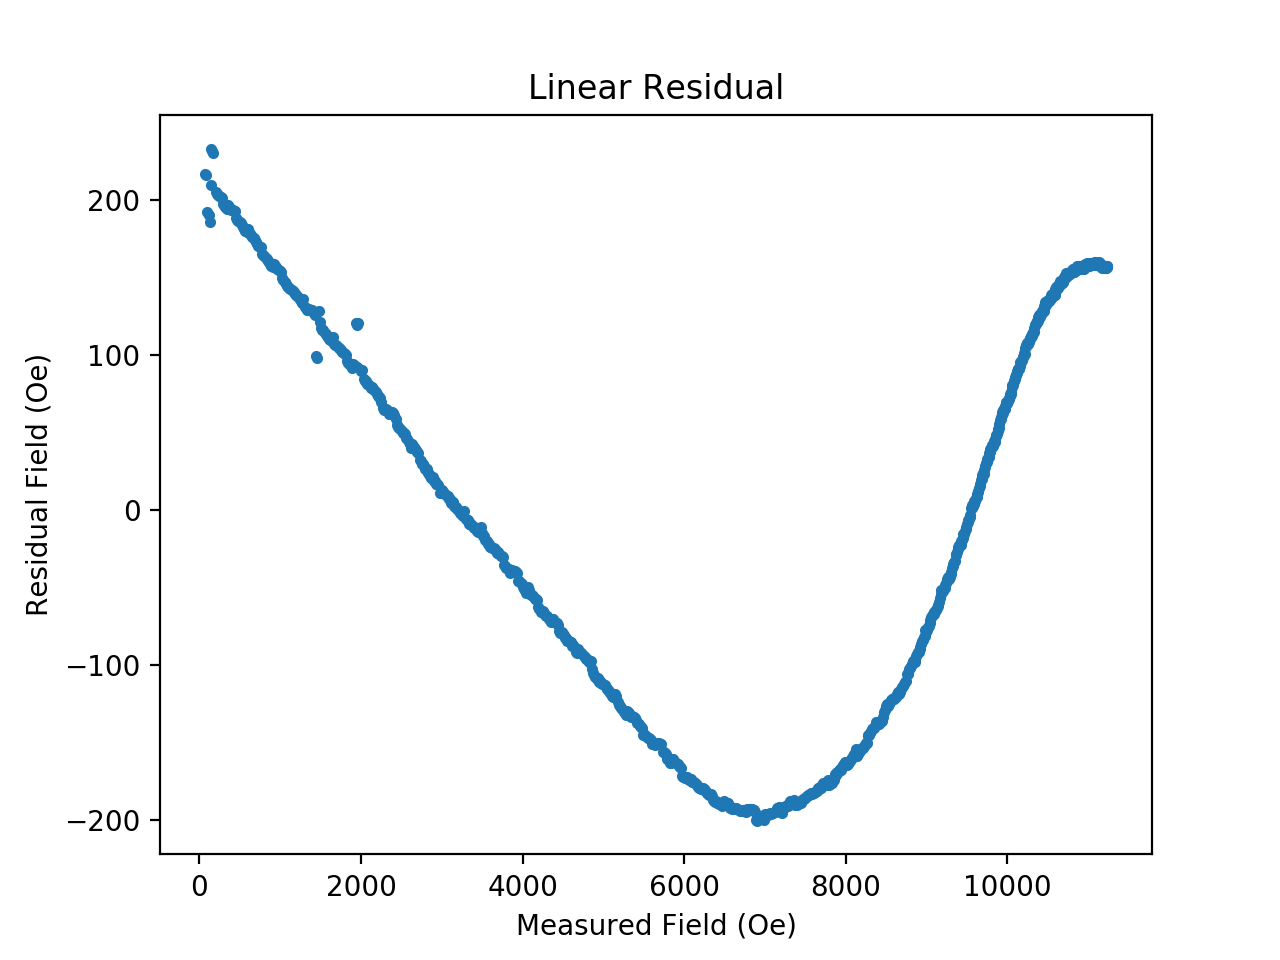

Text(0.5,1,u'Linear Residual')

In [18]:
%matplotlib notebook
plt.plot(twopowersupplies_lowered[1],twopowersupplies_centered[1]-doublefit(twopowersupplies_lowered[1]),'.')
plt.xlabel('Measured Field (Oe)')
plt.ylabel('Residual Field (Oe)')
plt.title('Linear Residual')

<IPython.core.display.Javascript object>


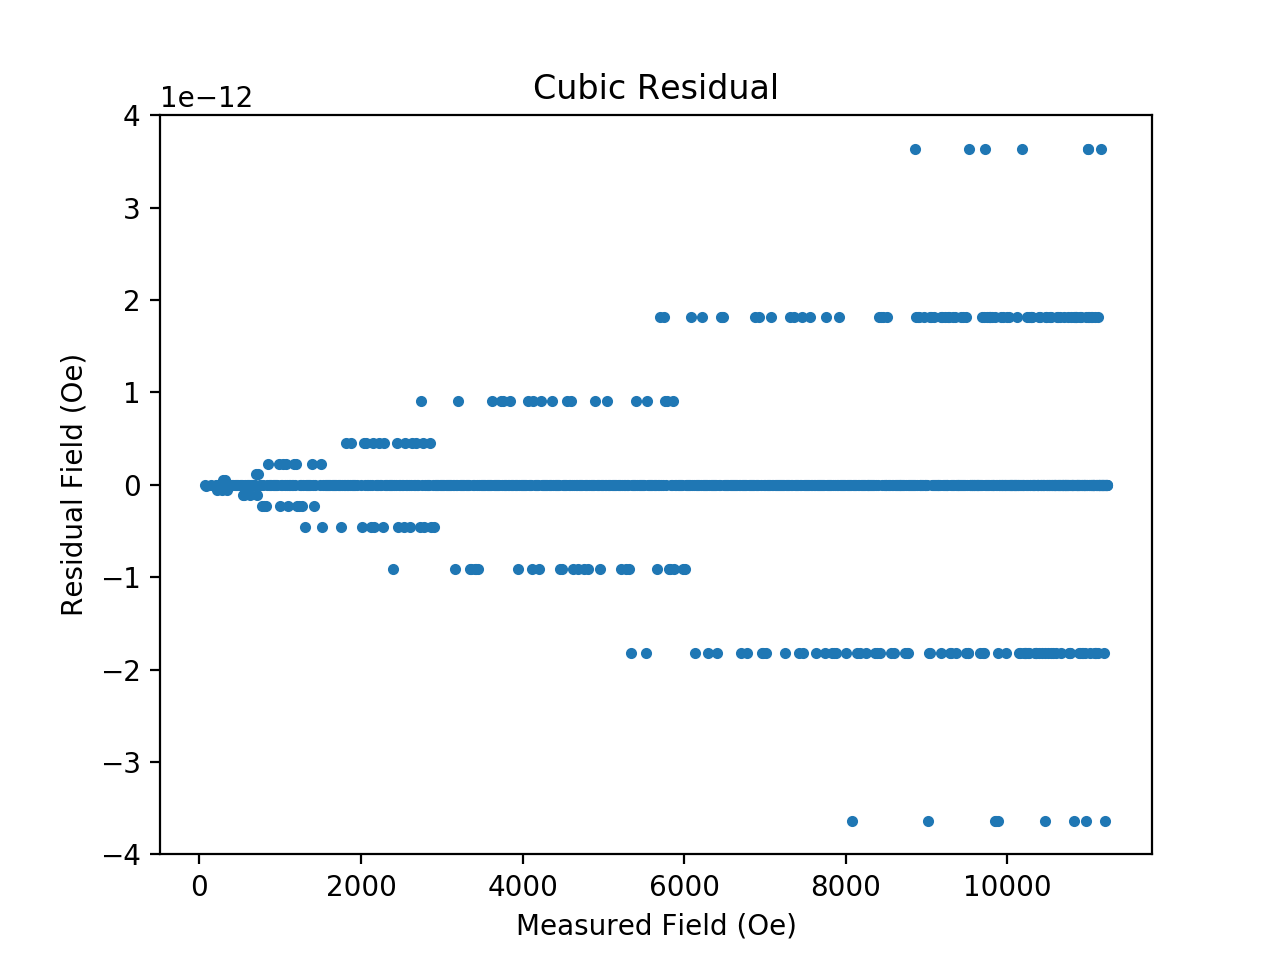

Text(0.5,1,u'Cubic Residual')

In [19]:
%matplotlib notebook
plt.plot(lower2,center2-fit(lower2),'.')
plt.xlabel('Measured Field (Oe)')
plt.ylabel('Residual Field (Oe)')
plt.title('Cubic Residual')

<IPython.core.display.Javascript object>


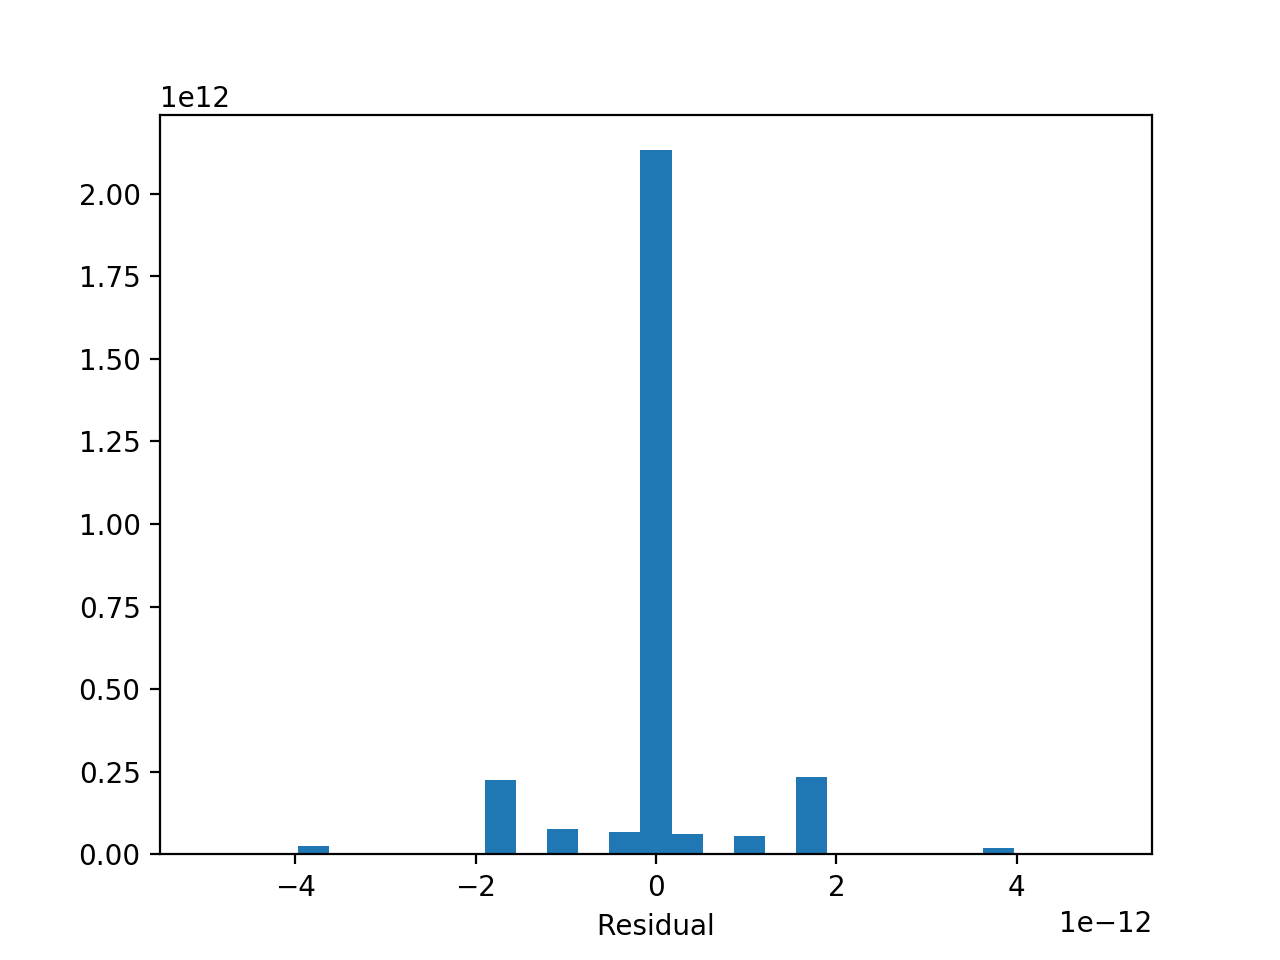

Text(0.5,0,u'Residual')

In [20]:
rbins = np.linspace(-5e-12,5e-12,30)
%matplotlib notebook
plt.hist(center2-fit(lower2), bins=rbins, density=True)
plt.xlabel('Residual')

Not measured for this particular sample

In [21]:
onepowersupply_centered = np.loadtxt('Hcalib-single-center.csv',delimiter=',',unpack=True)
onepowersupply_lowered = np.loadtxt('Hcalib-single-lower.csv',delimiter=',',unpack=True)

<IPython.core.display.Javascript object>


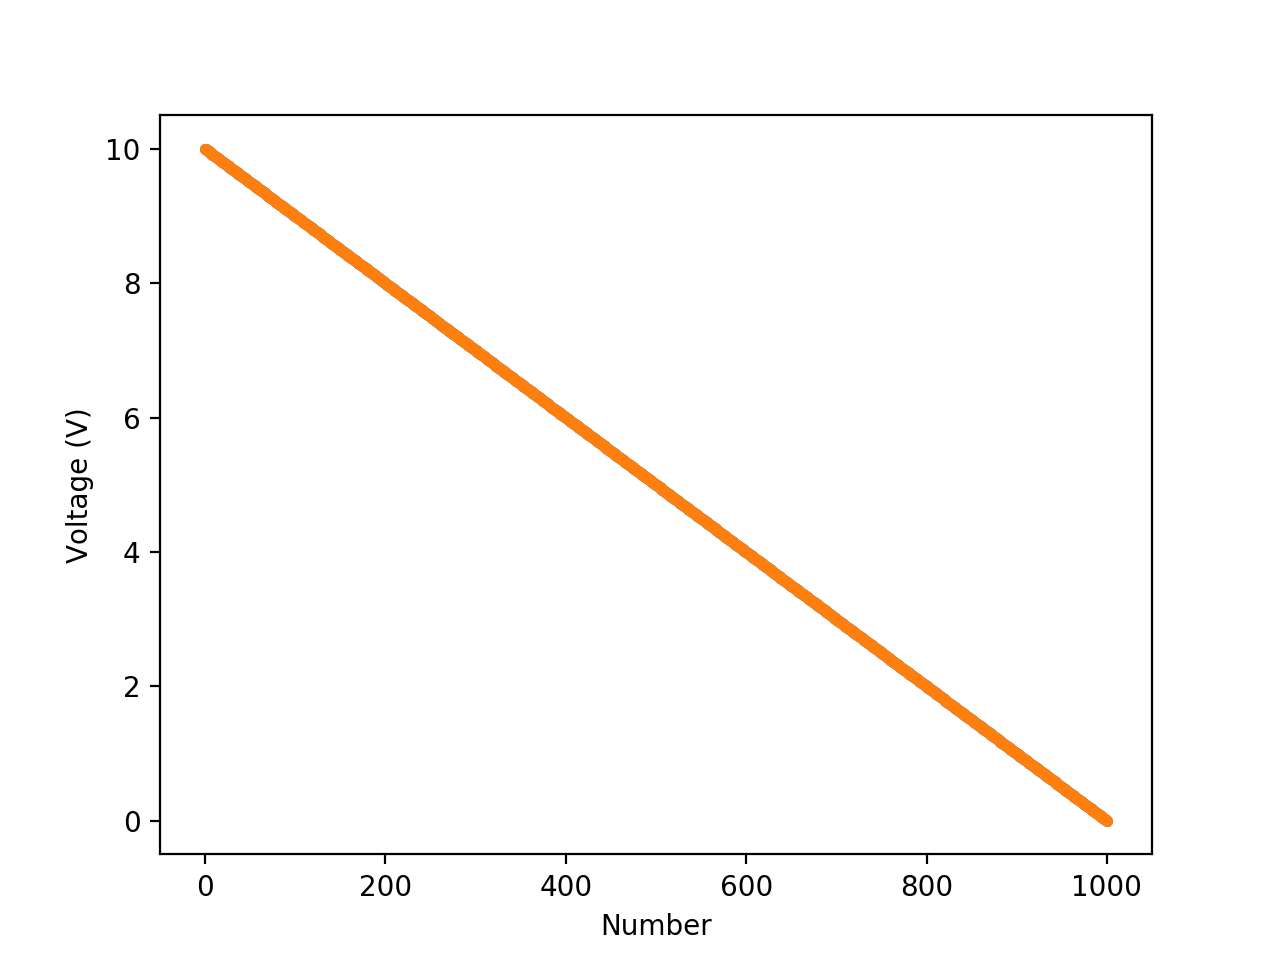

Text(0.5,0,u'Number')

In [22]:
%matplotlib notebook
plt.plot(onepowersupply_centered[0],'.')
plt.plot(onepowersupply_lowered[0],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Number')

<IPython.core.display.Javascript object>


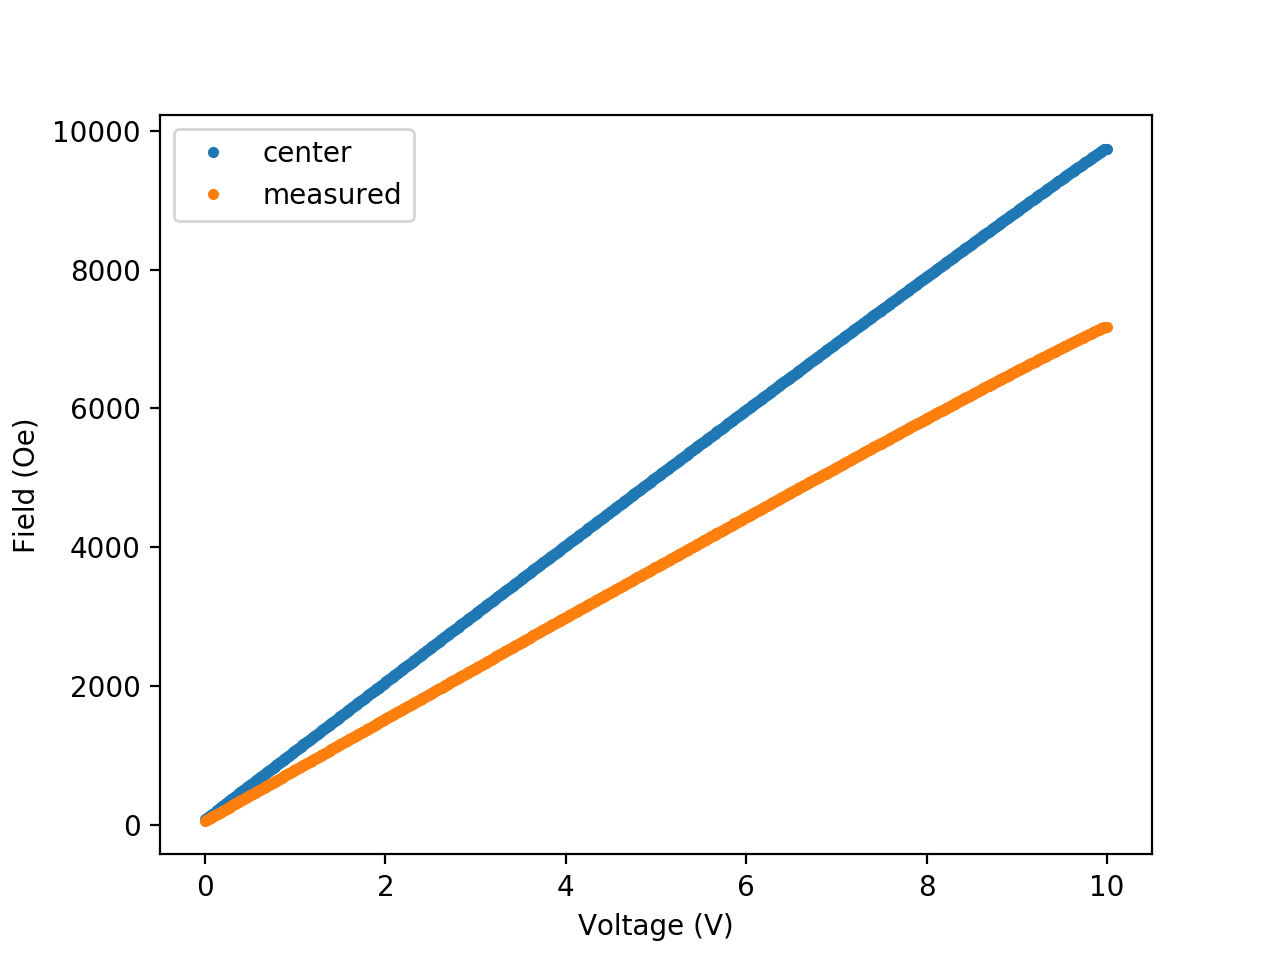

In [23]:
%matplotlib notebook
plt.plot(onepowersupply_centered[0],onepowersupply_centered[1],'.',label='center')
plt.plot(onepowersupply_lowered[0],onepowersupply_lowered[1],'.',label='measured')
plt.xlabel('Voltage (V)')
plt.ylabel('Field (Oe)')
plt.legend()

In [24]:
voltage1 = onepowersupply_lowered[0][::-1]
lower1 = onepowersupply_lowered[1][::-1]
center1 = onepowersupply_centered[1][::-1]

In [25]:
jumpdownlower1 = np.where(lower1[1:] <= lower1[:-1])[0]
print jumpdownlower1
jumpdowncenter1 = np.where(center1[1:] <= center1[:-1])[0]
print jumpdowncenter1

[ 16 261 999]
[  8 191]


<IPython.core.display.Javascript object>


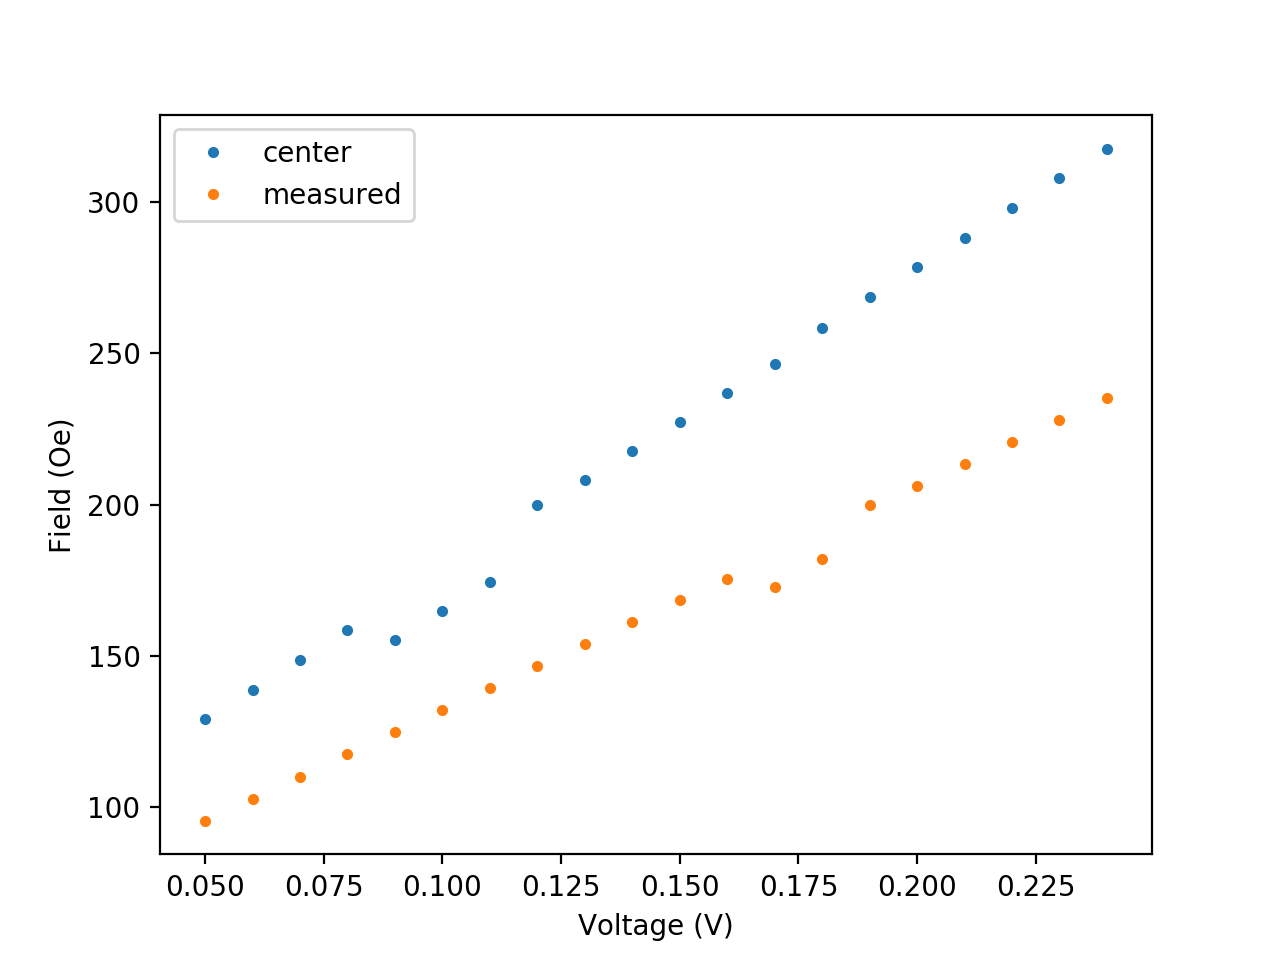

In [26]:
%matplotlib notebook
s = slice(5,25)
plt.plot(voltage1[s],center1[s],'.',label='center')
plt.plot(voltage1[s],lower1[s],'.',label='measured')
plt.xlabel('Voltage (V)')
plt.ylabel('Field (Oe)')
plt.legend()

In [27]:
while (len(jumpdownlower1) > 0):
    start = jumpdownlower1[0]+1
    sd = slice(start,start+3)
    voltage1 = np.delete(voltage1,sd)
    lower1 = np.delete(lower1,sd)
    center1 = np.delete(center1,sd)
    jumpdownlower1 = np.where(lower1[1:] <= lower1[:-1])[0]
    print jumpdownlower1

[258 996]
[993]
[]


In [28]:
while (len(jumpdowncenter1) > 0):
    start = jumpdowncenter1[0]+1
    sd = slice(start,start+3)
    voltage1 = np.delete(voltage1,sd)
    lower1 = np.delete(lower1,sd)
    center1 = np.delete(center1,sd)
    jumpdowncenter1 = np.where(center1[1:] <= center1[:-1])[0]
    print jumpdowncenter1

[185]
[]


<IPython.core.display.Javascript object>


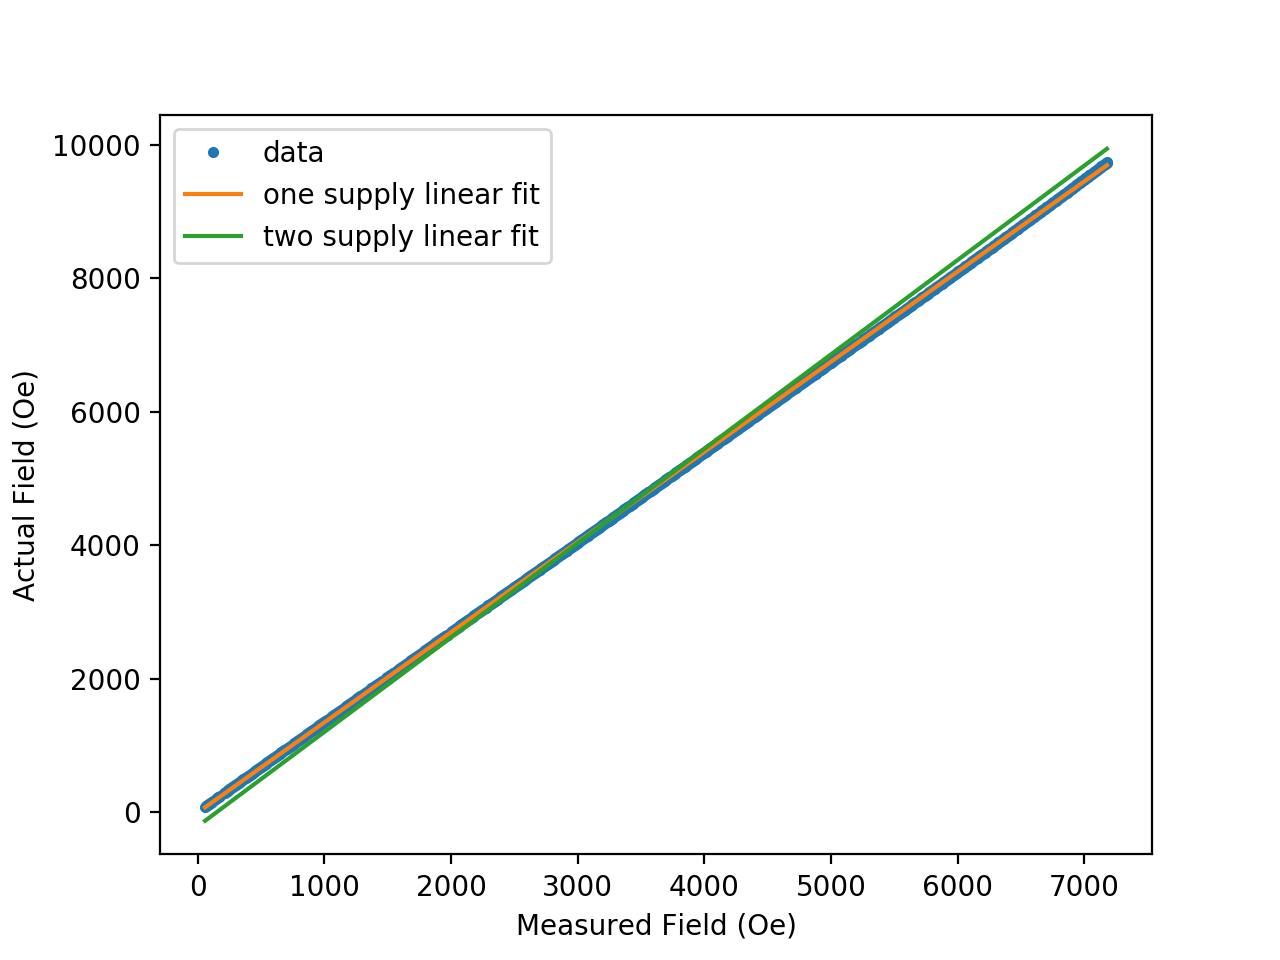

Text(0,0.5,u'Actual Field (Oe)')

In [29]:
%matplotlib notebook
plt.plot(lower1,center1,'.',label='data')
plt.xlabel('Measured Field (Oe)')
plt.ylabel('Actual Field (Oe)')

In [30]:
singlecoefficients = polyfit(onepowersupply_lowered[1],onepowersupply_centered[1], 1)
singlefit = poly1d(singlecoefficients)

In [31]:
plt.plot(onepowersupply_lowered[1],singlefit(onepowersupply_lowered[1]),'-',label='one supply linear fit')
plt.plot(onepowersupply_lowered[1],doublefit(onepowersupply_lowered[1]),'-',label='two supply linear fit')
plt.legend()

In [32]:
print singlecoefficients

[  1.35243532 -10.59042018]


<IPython.core.display.Javascript object>


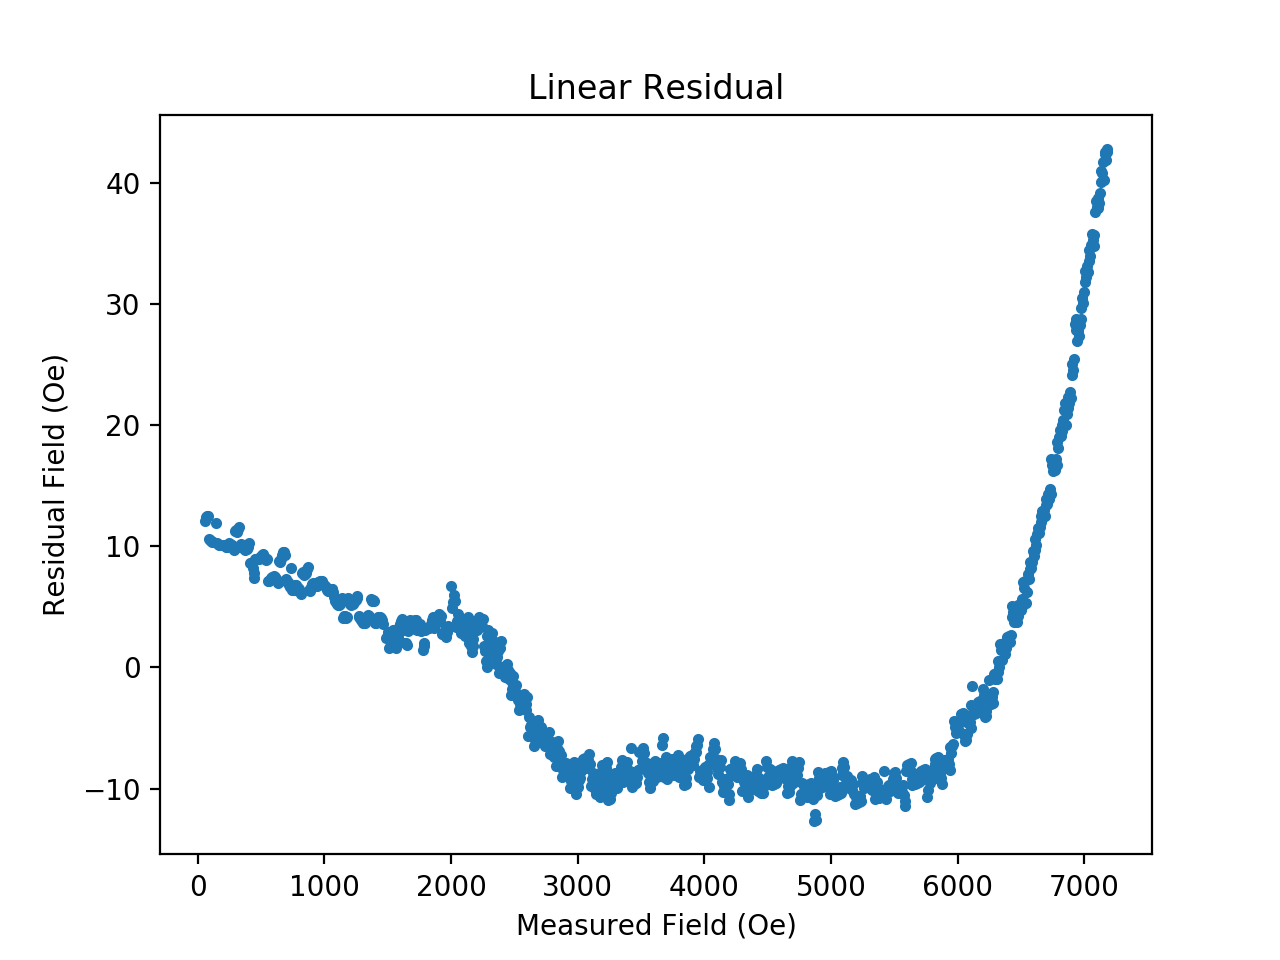

Text(0.5,1,u'Linear Residual')

In [33]:
%matplotlib notebook
plt.plot(lower1,center1-singlefit(lower1),'.')
plt.xlabel('Measured Field (Oe)')
plt.ylabel('Residual Field (Oe)')
plt.title('Linear Residual')

<IPython.core.display.Javascript object>


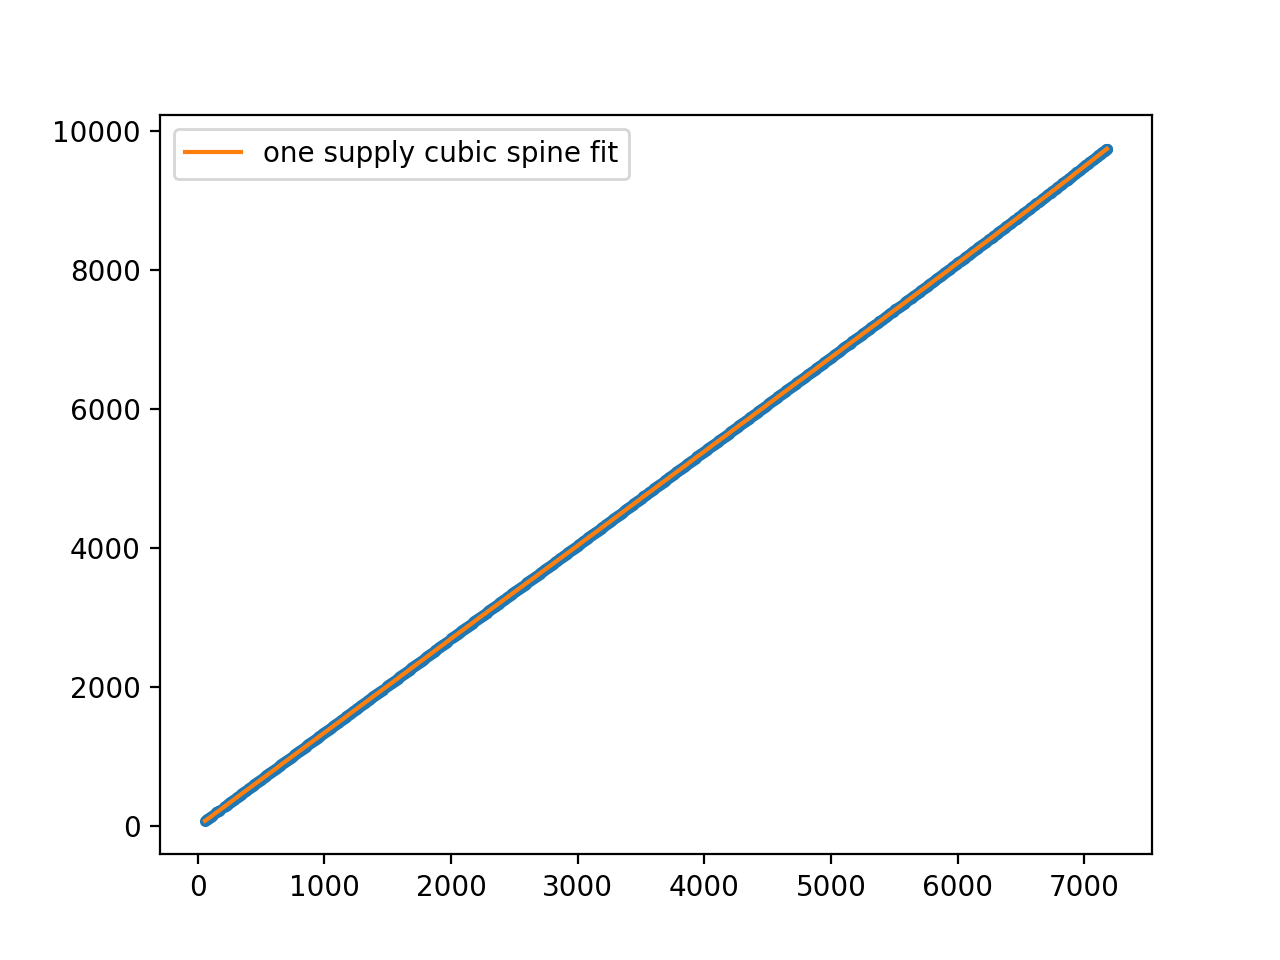

In [34]:
fit1 = interp1d(lower1,center1,kind='cubic')
%matplotlib notebook
plt.plot(lower1,center1,'.')
plt.plot(lower1,fit1(lower1),'-',label='one supply cubic spine fit')
plt.legend()

<IPython.core.display.Javascript object>


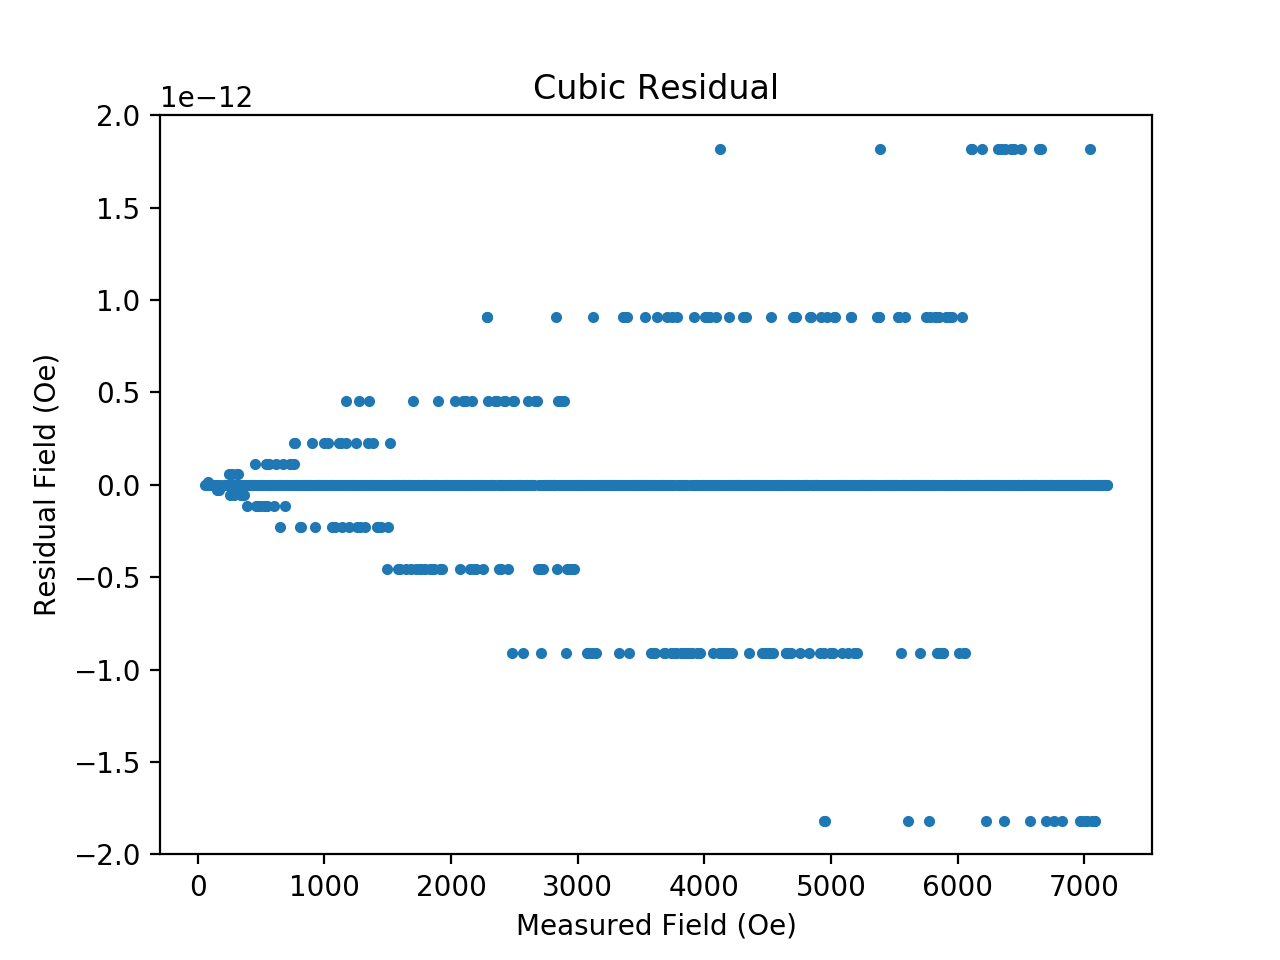

Text(0.5,1,u'Cubic Residual')

In [35]:
%matplotlib notebook
plt.plot(lower1,center1-fit1(lower1),'.')
plt.xlabel('Measured Field (Oe)')
plt.ylabel('Residual Field (Oe)')
plt.title('Cubic Residual')

<IPython.core.display.Javascript object>


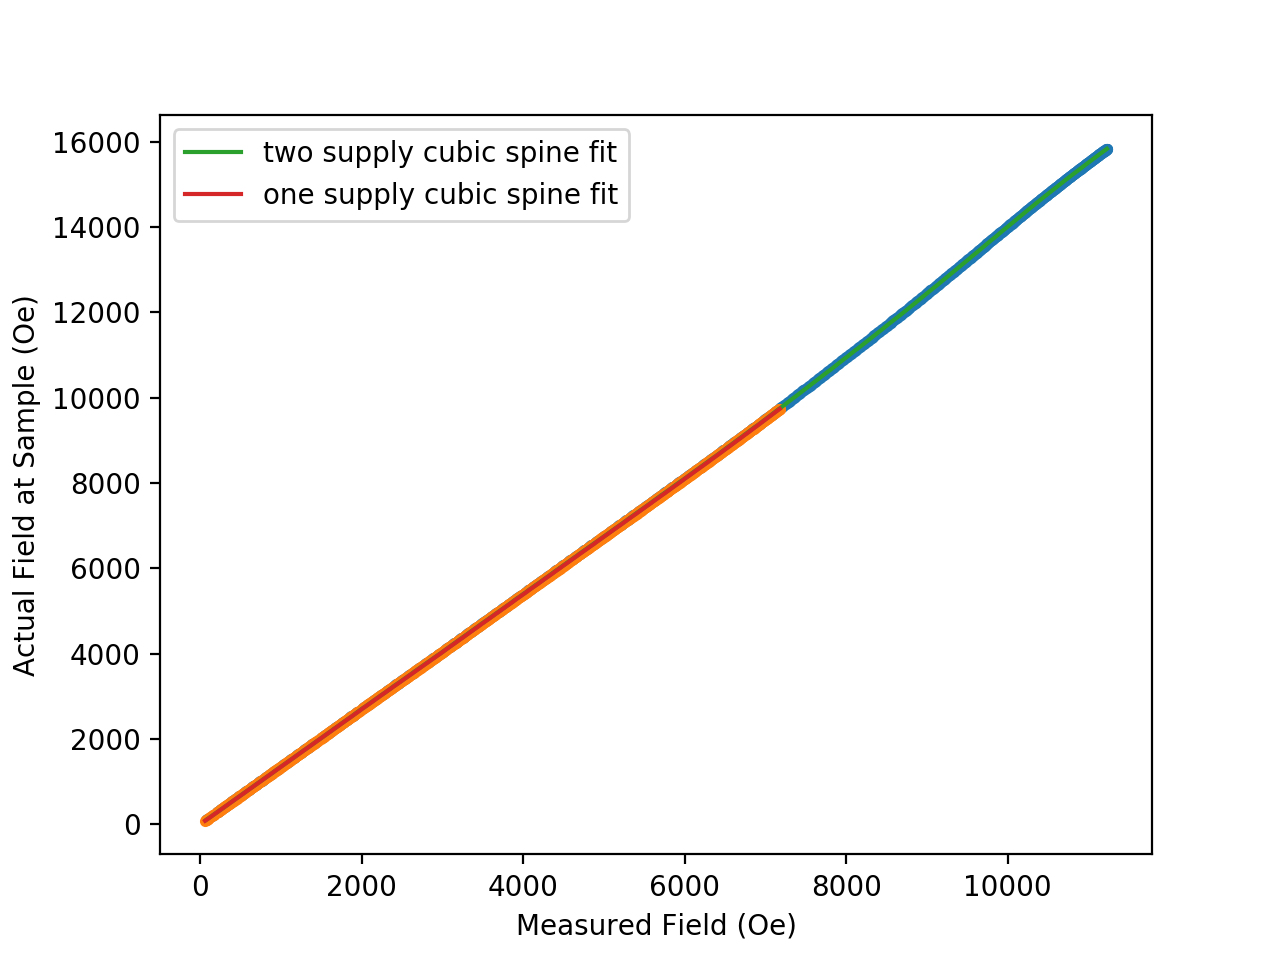

In [36]:
%matplotlib notebook
plt.plot(lower2,center2,'.')
plt.plot(lower1,center1,'.')
plt.plot(lower2,fit(lower2),'-',label='two supply cubic spine fit')
plt.plot(lower1,fit1(lower1),'-',label='one supply cubic spine fit')
plt.xlabel('Measured Field (Oe)')
plt.ylabel('Actual Field at Sample (Oe)')
plt.legend()

The measured field is scaled already with the following - needs to be undone before mapping - can also be read out from the filename

In [37]:
h_read_scale = 1.35244
h_read_offset = -10.590

Saving results to a file - can't save the spline so must redo that

In [38]:
outfile = 'fieldcalib190806'
np.savez(outfile, onesupply_voltage = voltage1, onesupply_measuredH = lower1, onesupply_actualH = center1,
         twosupply_voltage = voltage2, twosupply_measuredH = lower2, twosupply_actualH = center2,
         h_read_scale = h_read_scale, h_read_offset = h_read_offset)
#can't save the spline, so need to recalculate that in the next step

In [39]:
data = np.load('fieldcalib190806.npz')

In [40]:
voltage1 = data['onesupply_voltage']
lower1 = data['onesupply_measuredH']
center1 = data['onesupply_actualH']
voltage2 = data['twosupply_voltage']
lower2 = data['twosupply_measuredH']
center2 = data['twosupply_actualH']
len(center2)

988

<IPython.core.display.Javascript object>


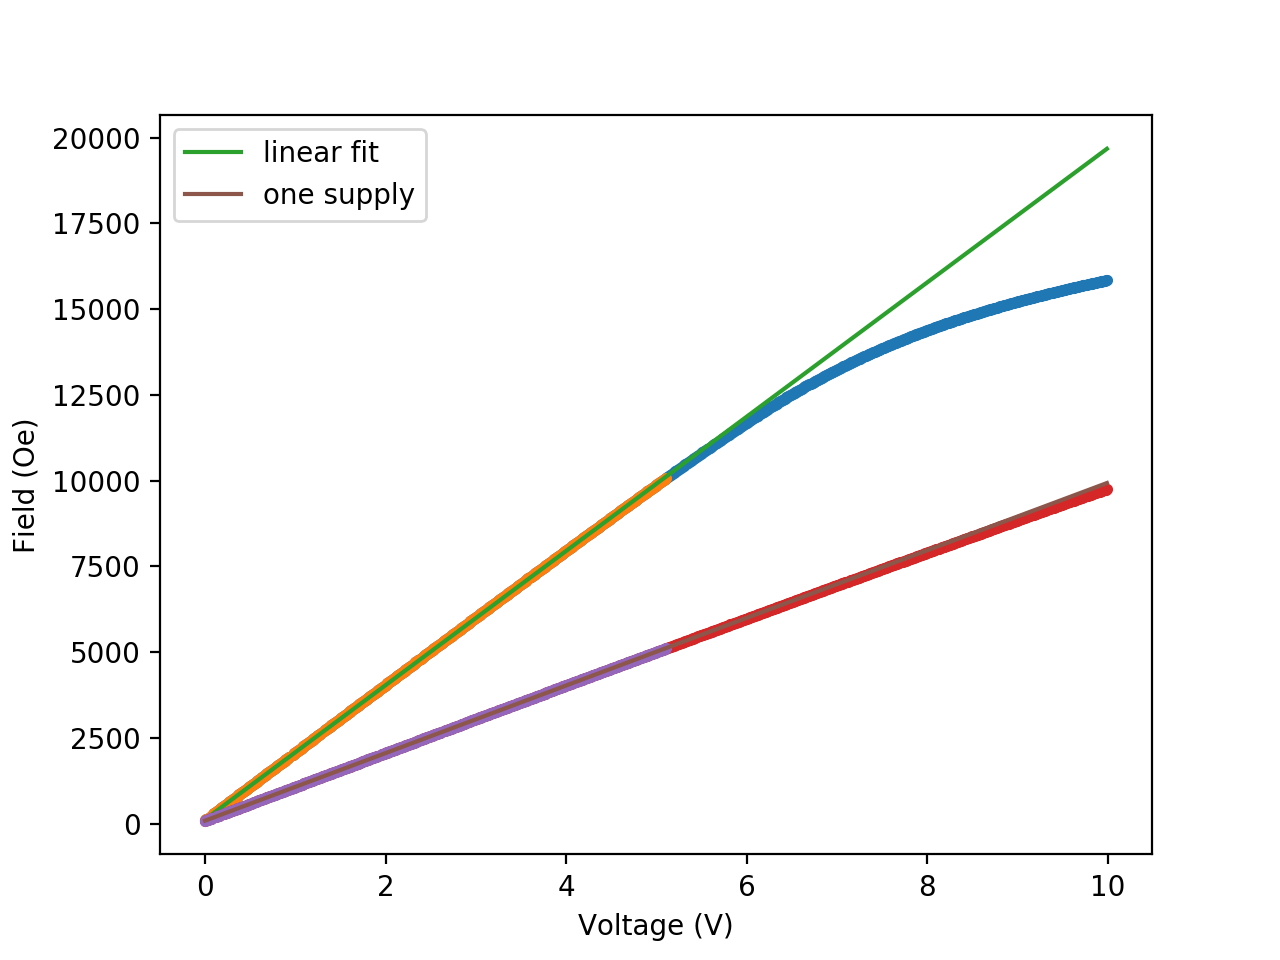

Text(0,0.5,u'Field (Oe)')

In [41]:
voltagesingcoefficients = polyfit(voltage1[:500],center1[:500], 1)
voltagefit1 = poly1d(voltagesingcoefficients)
voltagedoubcoefficients = polyfit(voltage2[:500],center2[:500], 1)
voltagefit2 = poly1d(voltagedoubcoefficients)
%matplotlib notebook
plt.plot(voltage2,center2,'.')
plt.plot(voltage2[:500],center2[:500],'.')
plt.plot(voltage2,voltagefit2(voltage2),'-',label='linear fit')
plt.plot(voltage1,center1,'.')
plt.plot(voltage1[:500],center1[:500],'.')
plt.plot(voltage1,voltagefit1(voltage1),'-',label='one supply')
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Field (Oe)')

In [42]:
def Hconversion(field,numsupplies=2):
    if numsupplies == 2:
        argfield = np.abs(center2-field).argmin()
        Hconv = center2[argfield]/voltage2[argfield]
    else:
        argfield = np.abs(center1-field).argmin()
        Hconv = center1[argfield]/voltage1[argfield]
    return Hconv

In [43]:
print voltagefit1
print voltagefit2

 
985.4 x + 84.32
 
1957 x + 120.9


In [44]:
targetfield = 2000.
voltsperOe = Hconversion(2000,numsupplies=2)
print voltsperOe

2074.22680412


In [45]:
print singlecoefficients

[  1.35243532 -10.59042018]


In [47]:
print np.max(center1)
print np.max(center2)

9740.0
15838.0
